# 卷积神经网络（CNN）基础概念与公式推导

## 1. 基础概念

### 1.1 卷积神经网络简介
卷积神经网络（Convolutional Neural Network, CNN）是一种专门用于处理具有网格状拓扑结构数据的深度学习模型，广泛应用于图像分类、目标检测、语义分割等领域。CNN通过卷积操作提取局部特征，并利用池化操作降低计算复杂度。

### 1.2 核心组件
- **卷积层（Convolutional Layer）**：通过卷积核提取输入数据的局部特征。
- **激活函数（Activation Function）**：引入非线性，增强模型的表达能力。
- **池化层（Pooling Layer）**：对特征图进行降维，减少计算量。
- **全连接层（Fully Connected Layer）**：将提取的特征映射到输出空间。

---

## 2. 数学公式推导

### 2.1 卷积操作的本质
卷积操作可以分为**连续型卷积**和**离散型卷积**，其本质是描述一个函数 $ f(x) $ 对另一个函数 $ g(x) $ 的影响。在CNN中，$ f(x) $ 表示卷积核（权重），而 $ g(x) $ 表示输入信号（如图像）。

#### 2.1.1 连续型卷积
连续型卷积的数学定义为：
$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d\tau
$$
其中：
- $ f(\tau) $ 是卷积核（权重函数）。
- $ g(t - \tau) $ 是输入信号，经过平移后与卷积核相乘并积分。

#### 2.1.2 离散型卷积
离散型卷积的数学定义为：
$$
(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] g[n - m]
$$
在CNN中，输入信号通常是二维图像，卷积核也是二维矩阵，因此离散型卷积可以扩展为二维形式：
$$
Y[i, j] = \sum_{m=0}^{K_h-1} \sum_{n=0}^{K_w-1} X[i + m, j + n] \cdot K[m, n]
$$
其中：
- $ X $: 输入图像。
- $ K $: 卷积核。
- $ Y $: 输出特征图。

#### 2.1.3 权重函数的本质
卷积核 $ K $ 的作用是对输入信号 $ X $ 的局部区域进行加权求和。每个权重值表示对应位置像素的重要性，通过训练调整这些权重，CNN可以自动学习到输入数据中的重要特征。

---

### 2.2 池化操作的本质
池化操作的核心思想是利用图像或特征图中相邻像素之间的相似性，用一个像素代替一片区域内的所有像素。这不仅减少了数据的维度，还能增强模型的鲁棒性（对小范围的平移、缩放等变化不敏感）。

#### 2.2.1 最大池化（Max Pooling）
最大池化选择每个池化窗口内的最大值作为输出：
$$
Y_{\text{pool}}[i, j, c] = \max_{m=0}^{P_h-1} \max_{n=0}^{P_w-1} Y[i \cdot S_p + m, j \cdot S_p + n, c]
$$

#### 2.2.2 平均池化（Average Pooling）
平均池化计算每个池化窗口内的平均值作为输出：
$$
Y_{\text{pool}}[i, j, c] = \frac{1}{P_h \cdot P_w} \sum_{m=0}^{P_h-1} \sum_{n=0}^{P_w-1} Y[i \cdot S_p + m, j \cdot S_p + n, c]
$$

#### 2.2.3 池化的作用
- **降维**：减少特征图的大小，从而降低计算复杂度。
- **去噪**：通过选取代表性像素（最大值或平均值），去除噪声干扰。
- **平移不变性**：池化操作使得模型对输入的小范围平移更加鲁棒。

---

## 3. 反向传播

### 3.1 损失函数
假设损失函数为 $ L $，则反向传播的目标是最小化损失函数：
$$
L = \frac{1}{N} \sum_{i=1}^N \ell(y_i, \hat{y}_i)
$$
其中 $ y_i $ 是真实标签，$ \hat{y}_i $ 是预测值。

### 3.2 参数更新
通过链式法则计算梯度并更新参数。以卷积层为例，权重 $ K $ 和偏置 $ b $ 的梯度分别为：
$$
\frac{\partial L}{\partial K} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial K}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial b}
$$

使用梯度下降法更新参数：
$$
K \leftarrow K - \eta \cdot \frac{\partial L}{\partial K}
$$
$$
b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
$$
其中 $ \eta $ 是学习率。

---

## 4. 总结

### 4.1 卷积的本质
卷积操作的本质是通过卷积核（权重函数）对输入信号进行局部加权求和，从而提取输入数据中的重要特征。卷积核的权重通过训练自动调整，能够捕捉到输入数据中的模式和规律。

### 4.2 池化的本质
池化操作的本质是利用相邻像素之间的相似性，用一个像素代替一片区域内的所有像素。这不仅减少了数据的维度，还能增强模型的鲁棒性和平移不变性。

### 4.3 CNN的优势
卷积神经网络通过卷积、激活、池化和全连接等操作，能够高效地提取图像中的局部特征并进行分类或回归任务。其核心在于卷积操作的参数共享和稀疏连接，大大减少了模型的参数量和计算复杂度。

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
#transforms 提供的数据处理工具
import torchvision.transforms as transforms
#由于数据集比较大，我们通过工具在线下载数据集
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

我们首先来介绍一下这个下载函数

`CIFAR10` 类 `torchvision.datasets` 模块中的一个类，专门用于加载 CIFAR-10 数据集。它的构造函数接受以下参数：

 - `root`  类型：字符串 指定数据集存储的根目录路径
 - `train` 类型：布尔值 指定加载的是训练集还是测试集
 - `download` 类型：布尔值 指定是否在数据集不存在时自动从互联网下载
 - `transform` 类型：可调用对象（通常是 torchvision.transforms 中的变换函数） 对加载的数据进行预处理或数据增强
   - 在这里，`transforms.ToTensor()` 将 PIL 图像或 NumPy 数组转换为 PyTorch 张量，并将像素值从 `[0, 255]` 归一化到 `[0, 1]`。 




--- 

我们来介绍一下数据集

- trainset和testset可以直接用下标访问

- 每个样本为一个元组(data,label)

- data是3*32*32的Tensor，表示图像

- label时0-9之间的整数，代表图像的类别

Files already downloaded and verified
Files already downloaded and verified
训练集大小： 50000
测试集大小： 10000
[6 9 9 ... 9 1 1]
[   29    30    35 ... 49941 49992 49994]
[    4     5    32 ... 49993 49998 49999]
[    6    13    18 ... 49987 49991 49995]
[    9    17    21 ... 49979 49982 49983]
[    3    10    20 ... 49981 49984 49990]
[   27    40    51 ... 49964 49980 49988]
[    0    19    22 ... 49962 49966 49996]
[    7    11    12 ... 49965 49978 49986]
[    8    62    69 ... 49968 49976 49985]
[    1     2    14 ... 49963 49971 49997]


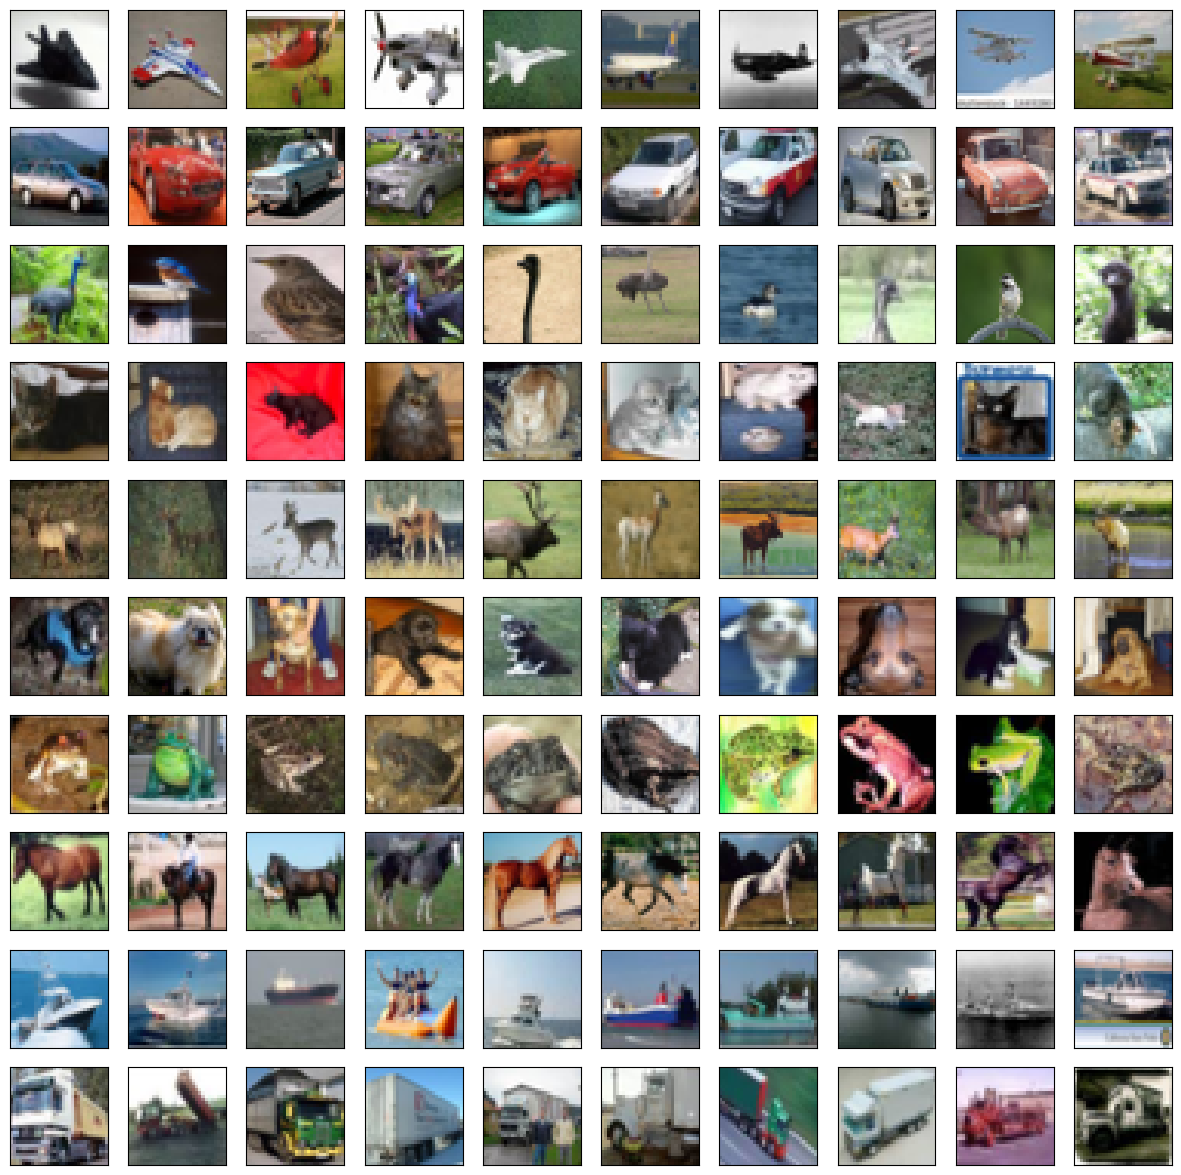

In [ ]:
#下载数据集和测试集
data_path='./cifar10'
trainset=CIFAR10(root=data_path,train=True,download=True,transform=transforms.ToTensor())

testset=CIFAR10(root=data_path,train=False,download=True,transform=transforms.ToTensor())

print('训练集大小：',len(trainset))
print('测试集大小：',len(testset))

#可视化数据集
num_classes=10
fig,axes=plt.subplots(num_classes,10,figsize=(15,15))
labels=np.array([t[1] for t in trainset])  #取出所有样本的标签  上文所示 [data,label]
print(labels)
for i in range(num_classes):
  indice=np.where(labels==i)[0] #类别为i的图像的下标
  print(indice)
  for j in range(10): #展示前十张图像
    #matplotlib绘制RGB图像时
    #图像矩阵依次时宽、高、颜色、与数据集中有差别
    #因此需要用permute重排数据的坐标轴
    axes[i][j].imshow(trainset[indice[j]][0].permute(1, 2, 0).numpy())
    # 去除坐标刻度
    axes[i][j].set_xticks([]) 
    axes[i][j].set_yticks([])
plt.show() 
  


看到这里，我有一个异或 既然labels是一个数组

那为什么 np.where(label==i) 是一个数组呢？

请看下文

In [ ]:
label=np.array([1,2,3,4,5,6,2])
indice=np.where(label==2)[0]
print(np.where(label==2))  #嗷嗷嗷 原来他返回的是一个元组
print(indice)

(array([1, 6], dtype=int64),)
[1 6]


好的 接下来我们来实现CNN

首先我们来介绍一下参数

 `Conv2D` :二维卷积层，参数依次为

-  `in_channels` : 输入通道
-  `out_channels`：输出通道，即卷积核个数
-  `kernel_size` ：卷积核大小，默认为正方形
-  `padding` ：填充层数，padding=1表示对输入四周各填充一层，默认填充0

--- 

### 介绍一下丢弃层

在卷积神经网络（CNN）中，丢弃层（Dropout Layer） 是一种常用的正则化技术，用于防止模型过拟合，增强模型的泛化能力。它通过随机“丢弃”一部分神经元（即将其输出设置为 0），强制网络学习更加鲁棒的特征表示。

- 在每次训练迭代中，以一定的概率 p 随机将部分神经元的输出置为 0。
- 被丢弃的神经元在当前迭代中不参与前向传播和反向传播。
- 在测试阶段，所有神经元都参与计算，但它们的输出会被缩放（乘以 1-p），以保持期望输出的一致性。

--- 

### 介绍一下全连接层

在 CNN 中，全连接层通常位于卷积层之后。由于卷积层的输出是一个三维张量（通道数、高度、宽度），需要将其展平为一维向量，才能输入到全连接层中。

--- 

In [ ]:
class CNN(nn.Module):

  def __init__(self, num_classes=10):
    super().__init__()
    # 类别数目
    self.num_classes=num_classes
    # Conv2D为二维卷积层，参数依次为
    # in_channels：输入通道
    # out_channels：输出通道，即卷积核个数
    # kernel_size：卷积核大小，默认为正方形
    # padding：填充层数，padding=1表示对输入四周各填充一层，默认填充0
    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1) #输入图像是 RGB 图像，因此有 3 个通道（红、绿、蓝）
    
    #第二层卷积，输入通道与上一层的输出通道保持一致
    self.conv2=nn.Conv2d(32,32,3,padding=1)

    #最大池化 kernel_size表示窗口大小，默认为正方形
    self.pooling1=nn.MaxPool2d(kernel_size=2)

    # 丢弃层，p表示每个位置被置为0的概率
    # 随机丢弃只在训练时开启，在测试时应当关闭
    self.dropout1=nn.Dropout(p=0.25)  ##Dropout 的作用是防止过拟合，增强模型的泛化能力

    self.conv3=nn.Conv2d(32,64,3,padding=1)
    self.conv4=nn.Conv2d(64,64,3,padding=1)
    self.pooling2=nn.MaxPool2d(2)
    self.dropout2=nn.Dropout(0.25)

    #全连接层，输入维度，上一层的输出是64个8x8的特征图，总共有64×8×8=4096个元素。
    self.fc1=nn.Linear(4096,512)  
    self.dropout3=nn.Dropout(0.5)
    self.fc2=nn.Linear(512,num_classes)
  # 向前传播，将输入按顺序以此通过设置好的层
  def forward(self,x):
   x = F.relu(self.conv1(x))
   x = F.relu(self.conv2(x))
   x = self.pooling1(x)
   x = self.dropout1(x)
   x = F.relu(self.conv3(x))
   x = F.relu(self.conv4(x))
   x = self.pooling2(x)
   x = self.dropout2(x)

   # 全连接层之前，将x的形状转为 (batch_size, n)
   x = x.view(len(x), -1)
   x = F.relu(self.fc1(x))
   x = self.dropout3(x)
   x = self.fc2(x)
   return x
    

## 特征图尺寸和通道数的变化解析

在卷积神经网络中，特征图的尺寸和通道数是由输入图像的尺寸、卷积层的参数（如卷积核大小、步幅和填充）、以及池化层的操作共同决定的。以下是对代码中特征图尺寸和通道数变化的详细分析。

---

### 输入图像
假设输入图像是一个典型的 CIFAR-10 数据集样本：
- 输入图像的尺寸为 **32x32**（宽度和高度），并且有 3 个通道（RGB）。
- 输入张量的形状为 `[batch_size, 3, 32, 32]`。

---

### 第一层卷积：`self.conv1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)`
- **输入通道数 (`in_channels=3`)**：
  - 输入图像是 RGB 图像，因此有 3 个通道。
  
- **输出通道数 (`out_channels=32`)**：
  - 输出特征图的数量为 32，表示这层使用了 32 个卷积核，每个卷积核会提取一种特征。
  
- **空间尺寸**：
  - 使用 3x3 的卷积核和 `padding=1`，保持空间尺寸不变。
  - 因此，输出特征图的尺寸仍然是 **32x32**。

- **输出形状**：
  - 输出张量的形状为 `[batch_size, 32, 32, 32]`。

---

### 第二层卷积：`self.conv2=nn.Conv2d(32, 32, 3, padding=1)`
- **输入通道数 (`in_channels=32`)**：
  - 输入是上一层的输出，即 32 个 32x32 的特征图。
  
- **输出通道数 (`out_channels=32`)**：
  - 输出特征图的数量仍为 32，表示这层继续使用 32 个卷积核来进一步提取特征。
  
- **空间尺寸**：
  - 使用 3x3 的卷积核和 `padding=1`，保持空间尺寸不变。
  - 因此，输出特征图的尺寸仍然是 **32x32**。

- **输出形状**：
  - 输出张量的形状仍为 `[batch_size, 32, 32, 32]`。

---

### 第一个最大池化层：`self.pooling1=nn.MaxPool2d(kernel_size=2)`
- **池化窗口大小 (`kernel_size=2`)**：
  - 使用 2x2 的最大池化窗口，步幅默认为 2。
  
- **空间尺寸变化**：
  - 池化操作将每个 2x2 的区域缩减为一个值（取最大值）。
  - 因此，特征图的尺寸从 **32x32** 缩小到 **16x16**。

- **输出形状**：
  - 输出张量的形状为 `[batch_size, 32, 16, 16]`。

---

### 第三层卷积：`self.conv3=nn.Conv2d(32, 64, 3, padding=1)`
- **输入通道数 (`in_channels=32`)**：
  - 输入是上一层的输出，即 32 个 16x16 的特征图。
  
- **输出通道数 (`out_channels=64`)**：
  - 输出特征图的数量增加到 64，表示这层使用了 64 个卷积核来提取更复杂的特征。
  
- **空间尺寸**：
  - 使用 3x3 的卷积核和 `padding=1`，保持空间尺寸不变。
  - 因此，输出特征图的尺寸仍然是 **16x16**。

- **输出形状**：
  - 输出张量的形状为 `[batch_size, 64, 16, 16]`。

---

### 第四层卷积：`self.conv4=nn.Conv2d(64, 64, 3, padding=1)`
- **输入通道数 (`in_channels=64`)**：
  - 输入是上一层的输出，即 64 个 16x16 的特征图。
  
- **输出通道数 (`out_channels=64`)**：
  - 输出特征图的数量仍为 64，表示这层继续使用 64 个卷积核来进一步提取特征。
  
- **空间尺寸**：
  - 使用 3x3 的卷积核和 `padding=1`，保持空间尺寸不变。
  - 因此，输出特征图的尺寸仍然是 **16x16**。

- **输出形状**：
  - 输出张量的形状仍为 `[batch_size, 64, 16, 16]`。

---

### 第二个最大池化层：`self.pooling2=nn.MaxPool2d(2)`
- **池化窗口大小 (`kernel_size=2`)**：
  - 再次使用 2x2 的最大池化窗口，步幅默认为 2。
  
- **空间尺寸变化**：
  - 特征图的尺寸从 **16x16** 缩小到 **8x8**。

- **输出形状**：
  - 输出张量的形状为 `[batch_size, 64, 8, 8]`。

---

### 总结
以下是每层卷积的输入通道数 (`in_channels`) 和输出通道数 (`out_channels`) 的变化过程：

| 层名称               | 输入通道数 (`in_channels`) | 输出通道数 (`out_channels`) | 空间尺寸   |
|----------------------|----------------------------|-----------------------------|------------|
| 输入图像             | 3 (RGB)                   | -                           | 32x32      |
| 第一层卷积           | 3                         | 32                          | 32x32      |
| 第二层卷积           | 32                        | 32                          | 32x32      |
| 第一个最大池化       | -                         | -                           | 16x16      |
| 第三层卷积           | 32                        | 64                          | 16x16      |
| 第四层卷积           | 64                        | 64                          | 16x16      |
| 第二个最大池化       | -                         | -                           | 8x8        |

最终的特征图形状为 `[batch_size, 64, 8, 8]`。

---

### 全连接层的输入维度
在全连接层之前，所有特征图会被展平为一维向量：
- 特征图的数量为 64（`out_channels=64`）。
- 每个特征图的尺寸为 8x8。
- 因此，展平后的向量长度为 $ 64 \times 8 \times 8 = 4096 $。

这就是为什么全连接层的输入维度设置为 4096 的原因。

In [ ]:
batch_size = 64 # 批量大小
learning_rate = 1e-3 # 学习率
epochs = 5 # 训练轮数
np.random.seed(0)
torch.manual_seed(0)

# 批量生成器
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = CNN()
# 使用Adam优化器
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# 使用交叉熵损失
criterion = F.cross_entropy

# 开始训练
for epoch in range(epochs):   #每个 epoch 都会遍历整个训练集，但数据的分组和顺序可能会不同，因为shuffle=True
    losses = 0
    accs = 0
    num = 0
    model.train() # 将模型设置为训练模式，开启dropout
    with tqdm(trainloader) as pbar:
        for data in pbar:
            images, labels = data
            outputs = model(images) # 获取输出
            loss = criterion(outputs, labels) # 计算损失
            # 优化
            optimizer.zero_grad()   #清空模型参数的梯度，避免梯度累积
            loss.backward()        #反向传播，计算损失相对于模型参数的梯度
            optimizer.step()       #根据梯度更新模型参数
            # 累积损失
            num += len(labels)
            losses += loss.detach().numpy() * len(labels)    #.detach().numpy() 将张量从计算图中分离并转换为 NumPy数组,
                                                             #损失函数会计算每个样本的损失，然后取平均值作为最终的 loss。

            # 精确度
            # `torch.argmax(outputs, dim=-1)` 对每个样本的预测结果（logits）取最大值的索引，得到预测类别
            accs += (torch.argmax(outputs, dim=-1) == labels).sum().detach().numpy()
            pbar.set_postfix({
                'Epoch': epoch, 
                'Train loss': f'{losses / num:.3f}', 
                'Train acc': f'{accs / num:.3f}'
            })
    
    # 计算模型在测试集上的表现
    losses = 0
    accs = 0
    num = 0
    model.eval() # 将模型设置为评估模式，关闭dropout
    with tqdm(testloader) as pbar:
        for data in pbar:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels)
            num += len(labels)
            losses += loss.detach().numpy() * len(labels)  
            accs += (torch.argmax(outputs, dim=-1) \
                == labels).sum().detach().numpy()
            pbar.set_postfix({
                'Epoch': epoch, 
                'Test loss': f'{losses / num:.3f}', 
                'Test acc': f'{accs / num:.3f}'
            })


100%|██████████| 157/157 [00:02<00:00, 60.70it/s, Epoch=4, Test loss=0.837, Test acc=0.709]


## CNN中的色彩风格迁移与VGG网络

### 9.4.1 VGG网络

VGG网络是一种广泛应用的卷积神经网络（CNN）结构，它通过反复堆叠基础模块来构建网络，避免了像AlexNet那样为每一层单独调整卷积核和池化的大小。VGG网络的设计范式使得其结构更加简洁且易于扩展。

#### VGG网络的结构特点：
- **VGG块**：每个VGG块由若干个大小为 $3 \times 3$、边缘填充为1的卷积层和一个窗口大小为 $2 \times 2$ 的最大池化层组成。
- **尺寸变化**：在每个VGG块中，卷积层由于引入了边缘填充，图像矩阵的大小保持不变；而池化层会使图像矩阵的长和宽变为原来的一半。
- **通道数翻倍**：每个VGG块的输出通道数是输入通道数的两倍。随着输入尺寸的减小，网络提取出的特征不断增多。
- **VGG16**：VGG16的第一个VGG块输出通道数为64，之后每次翻倍，直到512为止，共包含5个VGG块。

#### 特征提取的特点：
- 随着网络层数加深，卷积层提取的特征逐渐从局部像素信息过渡到整体风格特征。
- 浅层卷积核主要提取图像的细节信息，深层卷积核则提取图像的整体结构和风格特征。

---

### 色彩风格迁移的原理

色彩风格迁移的核心思想是利用预训练好的CNN（如VGG网络）提取图像的内容和风格特征，并通过梯度下降的方法优化输入图像，使其内容接近目标内容图像，同时风格接近目标风格图像。

#### 内容损失：
设提取内容的模型为 $f$，当前图像的矩阵为 $X$，内容图像的矩阵为 $C$。我们使用均方误差（MSE）作为内容损失：
$$
L_{\text{content}} = \frac{1}{2} \| f(X) - f(C) \|^2
$$
其中，$f(X)$ 和 $f(C)$ 分别表示模型对当前图像和内容图像提取的特征。

#### 风格损失：
风格特征通常通过计算格拉姆（Gram）矩阵来描述。假设某一层中有 $k$ 个卷积核，每个卷积核输出的特征矩阵大小为 $H \times W$，总元素数量为 $N = H \times W$。该卷积层输出的总特征矩阵为 $F \in \mathbb{R}^{k \times N}$，其格拉姆矩阵定义为：
$$
G = F F^T
$$
格拉姆矩阵反映了不同特征之间的相关性，捕捉了图像的全局风格属性。

设当前图像的风格矩阵为 $G_X$，风格图像的风格矩阵为 $G_S$。我们同样使用MSE作为风格损失：
$$
L_{\text{style}}^{(l)} = \frac{1}{4 k_l^2 N_l^2} \| G_X^{(l)} - G_S^{(l)} \|^2
$$
其中，$k_l$ 和 $N_l$ 分别表示第 $l$ 层的卷积核数量和特征矩阵的总元素数量。

为了综合多个卷积层的风格损失，我们对不同层的损失进行加权平均：
$$
L_{\text{style}} = \sum_{l=1}^L w_l L_{\text{style}}^{(l)}
$$
其中，$w_l$ 是第 $l$ 层的权重，简单起见可以令所有层的权重相等。

### 总损失函数：
最终的损失函数结合了内容损失和风格损失：
$$
L_{\text{total}} = \alpha L_{\text{content}} + \beta L_{\text{style}}
$$
其中，$\alpha$ 和 $\beta$ 用于控制内容和风格损失的相对重要性。

---

### 训练流程

1. **固定预训练网络**：使用预训练的VGG16网络提取图像的特征，网络参数在整个过程中保持固定。
2. **初始化输入图像**：可以从一张空白图像或随机噪声图像开始。
3. **计算损失**：通过VGG网络提取输入图像的内容和风格特征，并分别计算内容损失和风格损失。
4. **反向传播**：通过梯度下降方法更新输入图像（而非网络参数），以最小化总损失函数。
5. **迭代优化**：重复上述步骤，直到输入图像的内容和风格达到预期效果。

---

### 重要思维转变

传统的机器学习方法通常是对模型参数求导并更新参数，而在本节中，我们通过对**数据本身**（即输入图像）求导并更新数据，从而实现图像色彩风格的迁移。这种方法要求数据本身是连续可导的（如图像、语音等），而离散数据（如文本、类别标签）则无法直接应用。

---

### 总结

通过VGG网络提取图像的内容和风格特征，并利用梯度下降方法优化输入图像，可以实现高质量的色彩风格迁移。这种方法不仅展示了CNN的强大特征提取能力，还体现了“对数据求导”这一重要的机器学习思维方式。

--- 

#### 如果还是不理解本算法的具体作用，

#### 我们再具体介绍一下



## 1. 背景：CNN 的特征提取能力

卷积神经网络（CNN）是深度学习中处理图像任务的主力工具。它的核心能力在于通过多层卷积和池化操作，逐步从图像中提取出越来越抽象的特征。

- **浅层特征**：例如边缘、纹理等低级信息。
- **深层特征**：例如物体的整体形状、风格等高级信息。

这种特性使得 CNN 不仅可以用来分类图像，还可以用来分析图像的**内容**和**风格**。  
在本节中，我们利用预训练的 VGG 网络（如 VGG16），直接提取图像的内容和风格特征，而不需要重新训练模型。

---

## 2. 问题：什么是色彩风格迁移？

色彩风格迁移的目标是将一幅图像的**内容**（即图像中的主体、结构等信息）与另一幅图像的**风格**（如颜色、纹理等）结合起来，生成一幅新的图像。

### 一个具体的例子：

假设我们有两张图片：
- **内容图像**：一张普通的风景照片（比如一座山）。
- **风格图像**：一幅艺术画作（比如梵高的《星夜》）。

我们的目标是生成一张新的图像，这张图像既保留了风景照片中的“山”的结构和内容，又具有《星夜》的艺术风格（如旋转的星空、蓝色和黄色的笔触）。

---

## 3. 方法：如何实现色彩风格迁移？

### (1) 使用预训练的 VGG 网络提取特征

VGG 网络已经通过大规模数据集（如 ImageNet）训练好了，能够很好地提取图像的特征。我们利用这个预训练网络，分别提取内容图像和风格图像的特征：
- **内容特征**：使用较深的卷积层提取图像的整体结构信息。
- **风格特征**：使用较浅的卷积层提取图像的颜色、纹理等信息。

### (2) 定义损失函数

为了生成目标图像，我们需要定义两个损失函数：

1. **内容损失**：衡量生成图像与内容图像在内容特征上的差异。
   - 使用均方误差（MSE）计算：
     $$
     L_{\text{content}} = \frac{1}{2} \| f(X) - f(C) \|^2
     $$
     其中，$f(X)$ 是生成图像的内容特征(即我们最后得到的那个图像)，$f(C)$ 是内容图像的内容特征(即一开始我们提供的内容图像)。

2. **风格损失**：衡量生成图像与风格图像在风格特征上的差异。
   - 风格特征通过格拉姆矩阵（Gram Matrix）表示，反映不同特征之间的相关性。
   - 损失函数为：
     $$
     L_{\text{style}}^{(l)} = \frac{1}{4 k_l^2 N_l^2} \| G_X^{(l)} - G_S^{(l)} \|^2
     $$
     其中，$G_X^{(l)}$ 和 $G_S^{(l)}$ 分别是生成图像和风格图像在第 $l$ 层的格拉姆矩阵。

   - 综合多个卷积层的风格损失：
     $$
     L_{\text{style}} = \sum_{l=1}^L w_l L_{\text{style}}^{(l)}
     $$

3. **总损失函数**：
   将内容损失和风格损失结合在一起：
   $$
   L_{\text{total}} = \alpha L_{\text{content}} + \beta L_{\text{style}}
   $$
   其中，$\alpha$ 和 $\beta$ 是权重，用于控制内容和风格的重要性。

---

### (3) 优化生成图像

传统的机器学习方法通常是对模型参数进行优化（如调整神经网络的权重）。但在色彩风格迁移中，我们固定了预训练的 VGG 网络参数，转而对输入图像（即生成图像）进行优化。

#### 具体步骤：

1. **初始化生成图像**：可以用随机噪声图像或内容图像作为初始值。
2. **前向传播**：将生成图像输入到 VGG 网络中，提取其内容特征和风格特征。
3. **计算损失**：根据上述损失函数计算当前生成图像的内容损失和风格损失。
4. **反向传播**：通过梯度下降方法更新生成图像的像素值，以减小总损失。
5. **迭代优化**：重复上述步骤，直到生成图像的内容和风格达到预期效果。

---

## 4. 为什么这种方法有效？

### (1) 利用预训练网络的强大特征提取能力

VGG 网络已经在大规模数据集上训练过，能够很好地提取图像的内容和风格特征。因此，我们可以直接复用这些特征，而不需要重新训练模型。

### (2) 内容和风格分离

- **内容特征**：由深层卷积层提取，反映了图像的整体结构。
- **风格特征**：由浅层卷积层提取，反映了图像的颜色和纹理。

通过分别优化内容损失和风格损失，我们可以将两者的特性结合起来。

### (3) 对数据求导

传统的优化方法是对模型参数求导，而在色彩风格迁移中，我们对输入数据（即生成图像）求导。这种方法的创新之处在于，它展示了如何通过对数据本身的优化来实现特定任务。

---

## 5. 实际应用：色彩风格迁移的意义

### (1) 艺术创作

色彩风格迁移可以将普通照片转化为艺术作品。例如，将风景照片转换成梵高、莫奈等艺术家的风格。

### (2) 图像编辑

在电影、游戏等领域，色彩风格迁移可以快速生成具有特定视觉风格的图像。

### (3) 生物医学成像

在一些生物医学任务中，色彩风格迁移可以帮助标准化不同设备拍摄的图像，使其具有一致的视觉风格。

---

## 6. 总结

色彩风格迁移的核心思想是利用预训练的 CNN（如 VGG 网络）提取图像的内容和风格特征，并通过优化生成图像的像素值，使其同时满足内容和风格的要求。这种方法不仅展示了 CNN 强大的特征提取能力，还体现了“对数据求导”这一创新的思维方式。

---- 

介绍一下图像的处理

  `img=transform(torch.tensor(img).permute(2,0,1))`  

将张量的维度从 (H, W, C) 转换为 (C, H, W)，即通道维放在最前面。
这是因为 PyTorch 的卷积操作要求输入张量的形状为 (batch_size, channels, height, width)。

内容图像


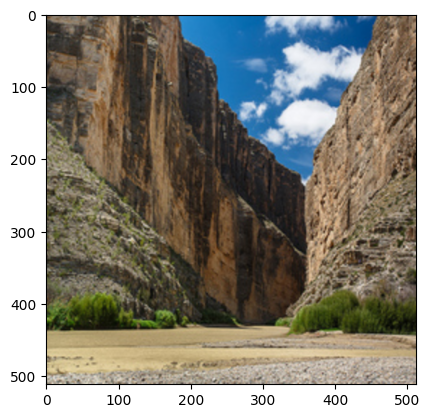

风格图像


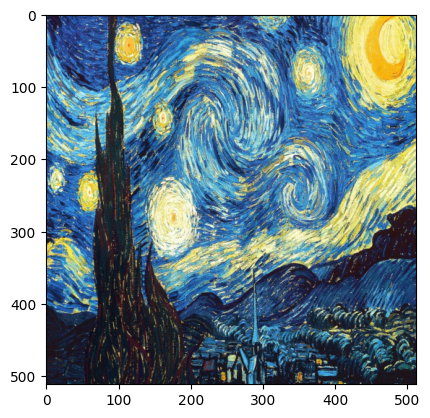

In [4]:
#该工具中有AlexNet、VGG等多种训练好的模型
from torchvision import models
import copy

#定义图像的处理办法
transform=transforms.Resize([512,512])  #规整图像的形状,输入图像调整为固定大小（512x512）

def loading(path):
  #加载图像
  img=plt.imread(path)
  #处理图像
  img=transform(torch.tensor(img).permute(2,0,1))  #将张量的维度从 (H, W, C) 转换为 (C, H, W)
  #展示图像
  plt.imshow(img.permute(1,2,0).numpy())  #将张量的维度从 (C, H, W) 转换回 (H, W, C)，以便 matplotlib 可以正确显示图像
  plt.show()
  #添加batch size 维度
  img=img.unsqueeze(0).to(dtype=torch.float32)
  img/=255  #将其值从0-255的整数转换为0-1的浮点数
  return img

content_image_path=os.path.join('style_transfer','content','04.jpg')
style_image_path=os.path.join('style_transfer','style.jpg')

#加载内容图像
print('内容图像')
content_img=loading(content_image_path)

print('风格图像')
style_img=loading(style_image_path)




In [9]:
#定义内容损失
class ContentLoss(nn.Module):

  def __init__(self, traget):
    #traget 为从目标
    super().__init__()
    # 我们不对target求梯度，因此将target从梯度的计算图中分离出来
    self.target=traget.detach()
    self.criterion=nn.MSELoss()
  
  def forward(self,x):
    #利用MSE计算输入图像和目标图像之间的损失
    self.loss=self.criterion(x.clone(),self.target)
    return x   #只计算损失，不改变输入
  def backward(self):
    #由于本模块只包含损失计算，不改变输入，因此要单独定义反向传播
    self.loss.backward(retain_graph=True)
    return self.loss
  
def gram(x):
  #计算G矩阵
  batch_size,n,w,h=x.shape   #n为卷积核的数量 w，h为输入的宽和高  
  f=x.view(batch_size*n,w*h) #变换为二维
  g=f@f.T/(batch_size*n*w*h)  #除以参数的数目，归一化
  return g
  
#风格损失
class StyleLoss(nn.Module):
  def __init__(self, target):
    super().__init__()
    self.target_gram=gram(target.detach())
    self.criterion=nn.MSELoss()

  def forward(self,x):
    input_gram=gram(x.clone())
    self.loss=self.criterion(input_gram,self.target_gram)
    return x
  def backward(self):
    self.loss.backward(retain_graph=True)
    return self.loss

## 介绍一下pytorch中的卷积核



## `nn.Conv1d`、`nn.Conv2d` 和 `nn.Conv3d`23 

### 1. 数据维度

卷积操作的核心是通过卷积核（filter）在输入数据上滑动并提取特征。不同维度的卷积操作对应不同的输入数据形状。

- **`nn.Conv1d`**：用于一维卷积，通常处理时间序列数据或信号数据。
  - 输入数据形状：`(batch_size, channels, length)`
    - `batch_size`：批量大小。
    - `channels`：输入通道数（例如单通道信号或多通道信号）。
    - `length`：输入数据的时间步长或长度。
  - 应用场景：
    - 时间序列预测（如股票价格预测）。
    - 音频信号处理（如语音识别中的 MFCC 特征提取）。

- **`nn.Conv2d`**：用于二维卷积，通常处理图像数据。
  - 输入数据形状：`(batch_size, channels, height, width)`
    - `batch_size`：批量大小。
    - `channels`：输入通道数（例如 RGB 图像有 3 个通道）。
    - `height` 和 `width`：输入图像的高度和宽度。
  - 应用场景：
    - 图像分类（如手写数字识别）。
    - 目标检测（如 YOLO、Faster R-CNN）。
    - 图像分割。

- **`nn.Conv3d`**：用于三维卷积，通常处理视频数据或体素数据。
  - 输入数据形状：`(batch_size, channels, depth, height, width)`
    - `batch_size`：批量大小。
    - `channels`：输入通道数。
    - `depth`：输入数据的时间维度（例如视频帧数）。
    - `height` 和 `width`：输入数据的空间高度和宽度。
  - 应用场景：
    - 视频分类（如动作识别）。
    - 医学影像分析（如 CT 或 MRI 数据）。

---

## 2. 卷积核的形状

卷积核的形状与输入数据的维度直接相关。

- **`nn.Conv1d`**：
  - 卷积核形状：`(out_channels, in_channels, kernel_size)`
  - 卷积核在一个维度上滑动（通常是时间轴）。
  - 示例：对于一个长度为 100 的信号，使用大小为 5 的卷积核会在时间轴上滑动。

- **`nn.Conv2d`**：
  - 卷积核形状：`(out_channels, in_channels, kernel_height, kernel_width)`
  - 卷积核在两个维度上滑动（通常是图像的高度和宽度）。
  - 示例：对于一张 $32 \times 32$ 的图像，使用 $3 \times 3$ 的卷积核会在图像的高和宽上滑动。

- **`nn.Conv3d`**：
  - 卷积核形状：`(out_channels, in_channels, kernel_depth, kernel_height, kernel_width)`
  - 卷积核在三个维度上滑动（通常是时间、高度和宽度）。
  - 示例：对于一段 $16 \times 32 \times 32$ 的视频片段，使用 $3 \times 3 \times 3$ 的卷积核会在时间、高度和宽度上滑动。

---


In [19]:
vgg16=models.vgg16(weights=True).features  #导入预训练的VGG16网络

# 选定用于提取特征的卷积层，Conv_13对应着第五块的第三卷积层
content_layer=['Conv_13']
# 下面这些层分别对应着第1至5块的第一层卷积层
style_layer=['Conv_1', 'Conv_3', 'Conv_5', 'Conv_8', 'Conv_11']

content_losses=[]  # 内容损失
style_losses=[]   # 风格损失

model=nn.Sequential()  # 储存新模型的层
vgg16=copy.deepcopy(vgg16)
index=1 #计数卷积层

# 遍历 VGG16 的网络结构，选取需要的层
for layer in list(vgg16):
  if isinstance(layer,nn.Conv2d): # 如果是卷积层
    name="Conv_"+str(index)
    model.append(layer)
    if name in content_layer:
      #如果当前层用于抽取内容特征，则添加内容损失
      target=model(content_img).clone()  #计算内容图像的特征
      content_loss = ContentLoss(target) #计算内容损失
      model.append(content_loss)
      content_losses.append(content_loss)
    
    if name in style_layer:
      #如果当前层用于抽取风格特征，则添加风格损失
      target=model(style_img).clone()
      style_loss = StyleLoss(target)
      model.append(style_loss)
      style_losses.append(style_loss)
    
  if isinstance(layer,nn.ReLU): # 如果激活函数层
    model.append(layer)
    index+=1

  if isinstance(layer,nn.MaxPool2d): #如果是池化层
    model.append(layer)

#输出模型结构
print(model)



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): StyleLoss(
    (criterion): MSELoss()
  )
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): StyleLoss(
    (criterion): MSELoss()
  )
  (8): ReLU(inplace=True)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU(inplace=True)
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): StyleLoss(
    (criterion): MSELoss()
  )
  (14): ReLU(inplace=True)
  (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): ReLU(inplace=True)
  (17): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1

训练轮数：0,	风格损失：6997.5825,	内容损失：0.0000


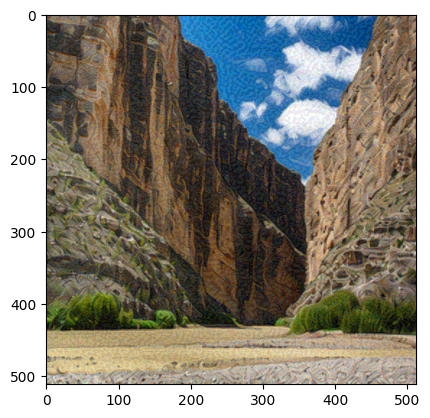

训练轮数：10,	风格损失：2278.1868,	内容损失：5.0592


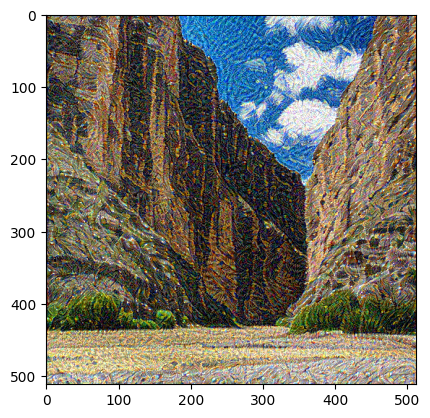

训练轮数：20,	风格损失：775.5217,	内容损失：5.1376


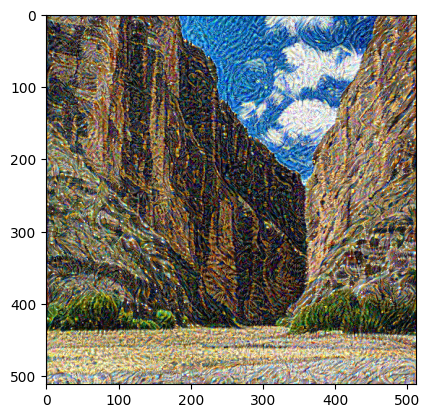

训练轮数：30,	风格损失：242.5923,	内容损失：4.3761


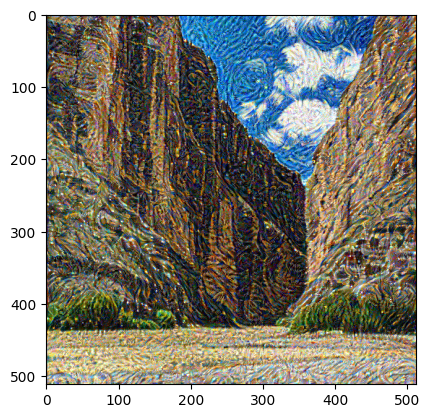

训练轮数：40,	风格损失：101.1480,	内容损失：3.8972


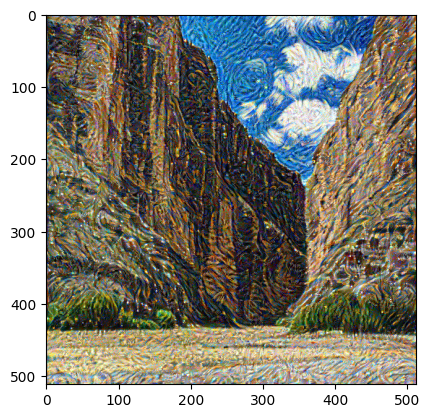

训练轮数：49,	风格损失：59.6925,	内容损失：3.5478


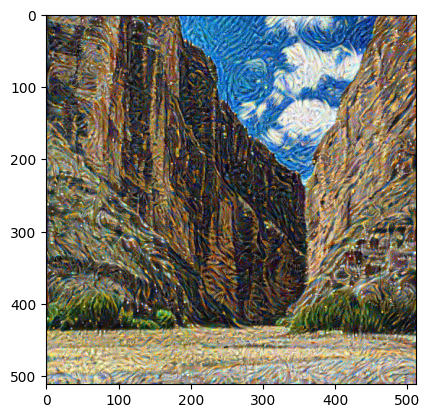

In [20]:
epochs = 50
learning_rate = 0.05
lbd = 1e6 # 强度系数

input_img = content_img.clone() # 从内容图像开始迁移
param = nn.Parameter(input_img.data) # 将图像内容设置为可训练的参数
optimizer = torch.optim.Adam([param], lr=learning_rate) # 使用Adam优化器

for i in range(epochs):
    style_score = 0  # 本轮的风格损失
    content_score = 0  # 本轮的内容损失
    model(param) # 将输入通过模型，得到损失
    for cl in content_losses:  
        content_score += cl.backward()
    for sl in style_losses:  
        style_score += sl.backward()
    style_score *= lbd
    loss = content_score + style_score
    # 更新输入图像
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每次对输入图像进行更新后
    # 图像中部分像素点会超出0-1的范围
    # 因此要对其进行剪切
    param.data.clamp_(0, 1) 

    if i % 10 == 0 or i == epochs - 1:
        print(f'训练轮数：{i},\t风格损失：{style_score.item():.4f},\t' \
            f'内容损失：{content_score.item():.4f}')
        plt.imshow(input_img[0].permute(1, 2, 0).numpy())
        plt.show()